<a href="https://colab.research.google.com/github/Pomaccel/DADS6003-APPLIED-MACHINE-LEARNING/blob/main/ml_6610422013_AS02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install package
!pip install pandas
!pip install numpy
!pip install requests
!pip install lxml
!pip install yfinance
!pip install cython

In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install


--2024-02-22 15:44:52--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-22 15:44:52--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-02-22 15:44:52--  http://cytranet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cytranet.dl.s

In [3]:
!pip install TA-lib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.1/357.1 kB 7.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for TA-lib: filename=TA_Lib-0.4.28-cp310-cp310-linux_x86_64.whl size=2017536 sha256=ccbca73bd028b6fdbcb100956431c55edf30d1d747a85ade565020cee3a22c5a
  Stored in directory: /root/.cache/pip/wheels/66/54/9d/10bfd00931c0c993f373269d350635df520b5064e5290a9d94
Successfully built TA-lib


In [4]:

import numpy as np
import pandas as pd
import yfinance as yf

# Technical Indicators
import talib as ta

# Plotting graphs
import matplotlib.pyplot as plt

# Machine learning
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [5]:
xom = yf.Ticker('XOM')
interval = '1h'
start = '2023-1-1'
end = '2024-2-1'
df = xom.history(interval=interval,start=start,end=end)
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-03 09:30:00-05:00,109.019997,110.019997,108.260002,108.469299,3044057,0.0,0.0
2023-01-03 10:30:00-05:00,108.459999,108.970001,107.599998,107.699997,1588424,0.0,0.0
2023-01-03 11:30:00-05:00,107.699997,107.714996,106.910004,107.290001,1298517,0.0,0.0
2023-01-03 12:30:00-05:00,107.290001,107.471603,106.449997,106.461098,1222839,0.0,0.0
2023-01-03 13:30:00-05:00,106.459999,106.660004,105.595001,105.790001,1411004,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-31 11:30:00-05:00,104.004997,104.114998,103.410004,103.720001,1597415,0.0,0.0
2024-01-31 12:30:00-05:00,103.720001,103.845001,103.500000,103.690002,1506843,0.0,0.0
2024-01-31 13:30:00-05:00,103.690002,103.919998,103.510002,103.714996,1548505,0.0,0.0


In [6]:
df = df.loc[:,"Open":"Close"]
df['S_10'] = df['Close'].rolling(window=10).mean()
df['Corr'] = df['Close'].rolling(window=10).corr(df['S_10'])
df['RSI'] = ta.RSI(np.array(df['Close']), timeperiod =10)
df['Open-Close'] = df['Open'] - df['Close'].shift(1)
df['Open-Open'] = df['Open'] - df['Open'].shift(1)
df = df.dropna()
X = df.iloc[:,:9]
xom = df.copy()
X

,Open,High,Low,Close,S_10,Corr,RSI,Open-Close,Open-Open
Datetime,,,,,,,,,
2023-01-05 13:30:00-05:00,109.790001,109.949997,109.330002,109.339996,107.667590,0.880094,61.059026,0.009102,0.900002
2023-01-05 14:30:00-05:00,109.339996,109.580002,109.010101,109.059998,107.892590,0.860960,57.799277,0.000000,-0.450005
2023-01-05 15:30:00-05:00,109.059998,109.315002,108.940002,109.209999,108.149590,0.836893,59.099042,0.000000,-0.279999
2023-01-06 09:30:00-05:00,110.080002,111.669998,109.900002,111.339996,108.688589,0.900408,72.474757,0.870003,1.020004
2023-01-06 10:30:00-05:00,111.349998,111.989998,111.349998,111.635002,109.211089,0.925041,73.793619,0.010002,1.269997
...,...,...,...,...,...,...,...,...,...
2024-01-31 11:30:00-05:00,104.004997,104.114998,103.410004,103.720001,104.041501,0.527401,57.167256,-0.005005,-0.563004
2024-01-31 12:30:00-05:00,103.720001,103.845001,103.500000,103.690002,104.110501,0.131123,56.526153,0.000000,-0.284996
2024-01-31 13:30:00-05:00,103.690002,103.919998,103.510002,103.714996,104.110001,-0.143672,56.972848,0.000000,-0.029999


In [7]:
y = np.where(df['Close'].shift(-1) > df['Close'],1,-1)
y


array([-1,  1,  1, ..., -1, -1, -1])

In [8]:
split = int(0.7*len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [9]:
model = LogisticRegression(max_iter = 1000)
model = model.fit (X_train,y_train)

In [10]:
pd.DataFrame(zip(X.columns, np.transpose(model.coef_)))

,0,1
0,Open,[-0.2416999881805759]
1,High,[0.17278018991522212]
2,Low,[0.08526913770290855]
3,Close,[-0.06645202380812498]
4,S_10,[0.03210989882403347]
5,Corr,[0.20167664112148442]
6,RSI,[0.002252810382026973]
7,Open-Close,[0.26479984741205503]
8,Open-Open,[-0.12566789326879702]


In [11]:
# Specify the date for prediction
prediction_date = '2024-02-21'
probability = model.predict_proba(X_test)
probability

array([[0.44827675, 0.55172325],
       [0.42989716, 0.57010284],
       [0.42307969, 0.57692031],
       ...,
       [0.46685194, 0.53314806],
       [0.48942553, 0.51057447],
       [0.4943331 , 0.5056669 ]])

In [ ]:
predicted = model.predict(X_test)
predicted

In [13]:
print(metrics.classification_report(y_test,predicted))

              precision    recall  f1-score   support

          -1       0.59      0.11      0.18       284
           1       0.50      0.92      0.65       278

    accuracy                           0.51       562
   macro avg       0.55      0.52      0.42       562
weighted avg       0.55      0.51      0.41       562



In [14]:
print(metrics.confusion_matrix(y_test, predicted))

[[ 30 254]
 [ 21 257]]


In [15]:
print(model.score(X_test,y_test))

0.5106761565836299


In [16]:
cross_val = cross_val_score(model, X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

[0.5212766  0.53475936 0.49197861 0.44919786 0.52406417 0.56684492
 0.52406417 0.46524064 0.50802139 0.56149733]
0.5146945044942541


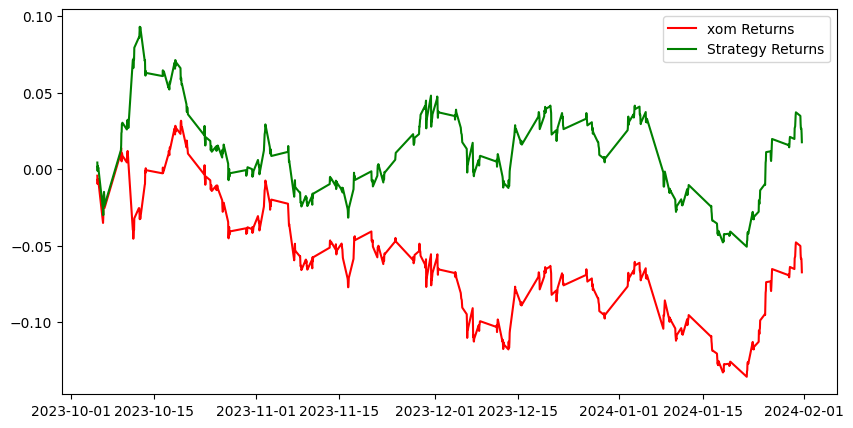

In [17]:
df['Predicted_Signal'] = model.predict(X)
df['xom_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nitfy_returns = np.cumsum(df[split:]['xom_returns'])

df['Strategy_returns'] = df['xom_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nitfy_returns, color='r', label = 'xom Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')

plt.legend()
plt.show()

In [18]:
lpg = yf.Ticker('NOG')
interval = '1h'
start = '2023-1-31'
end = '2024-2-1'
lpgdf = lpg.history(interval=interval,start=start,end=end)
lpgdf

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Datetime,,,,,,,
2023-01-31 09:30:00-05:00,33.490002,33.799999,33.230000,33.625000,136285,0.0,0.0
2023-01-31 10:30:00-05:00,33.619999,34.075001,33.619999,34.040001,165048,0.0,0.0
2023-01-31 11:30:00-05:00,34.009998,34.080002,33.575001,33.615002,159342,0.0,0.0
2023-01-31 12:30:00-05:00,33.601002,33.790001,33.599998,33.720001,123683,0.0,0.0
2023-01-31 13:30:00-05:00,33.730000,33.790001,33.450001,33.509998,211947,0.0,0.0
...,...,...,...,...,...,...,...
2024-01-31 11:30:00-05:00,34.560001,34.560001,34.205002,34.380001,190555,0.0,0.0
2024-01-31 12:30:00-05:00,34.389999,34.395000,34.169998,34.220001,97337,0.0,0.0
2024-01-31 13:30:00-05:00,34.215000,34.380001,33.970001,34.009998,128206,0.0,0.0


In [19]:
newdf = pd.merge(xom.iloc[:,:4],lpgdf.iloc[:,:4],how = "inner",left_index=True,right_index=True)
newdf

,Open_x,High_x,Low_x,Close_x,Open_y,High_y,Low_y,Close_y
Datetime,,,,,,,,
2023-01-31 09:30:00-05:00,112.099998,115.440002,110.430000,115.360001,33.490002,33.799999,33.230000,33.625000
2023-01-31 10:30:00-05:00,115.370003,116.151299,115.199997,115.750000,33.619999,34.075001,33.619999,34.040001
2023-01-31 11:30:00-05:00,115.764999,115.779999,114.599998,115.689796,34.009998,34.080002,33.575001,33.615002
2023-01-31 12:30:00-05:00,115.709900,115.959999,115.220001,115.870903,33.601002,33.790001,33.599998,33.720001
2023-01-31 13:30:00-05:00,115.885002,115.970001,115.300003,115.559998,33.730000,33.790001,33.450001,33.509998
...,...,...,...,...,...,...,...,...
2024-01-31 11:30:00-05:00,104.004997,104.114998,103.410004,103.720001,34.560001,34.560001,34.205002,34.380001
2024-01-31 12:30:00-05:00,103.720001,103.845001,103.500000,103.690002,34.389999,34.395000,34.169998,34.220001
2024-01-31 13:30:00-05:00,103.690002,103.919998,103.510002,103.714996,34.215000,34.380001,33.970001,34.009998


In [20]:
newdf.columns

Index(['Open_x', 'High_x', 'Low_x', 'Close_x', 'Open_y', 'High_y', 'Low_y',
       'Close_y'],
      dtype='object')

In [ ]:
newdf['S_10Y'] = newdf['Close_y'].rolling(window=10).mean()
newdf['CorrY'] = newdf['Close_y'].rolling(window=10).corr(newdf['S_10Y'])
# new indicator
fastk, fastd = ta.STOCHRSI(newdf['Close_y'], timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
MOM = ta.MOM(newdf['Close_y'], timeperiod=10)
macd, macdsignal, macdhist = ta.MACD(newdf['Close_y'], fastperiod=12, slowperiod=26, signalperiod=9)
adxr = ta.ADXR(newdf['High_y'], newdf['Low_y'], newdf['Close_y'], timeperiod=14)

newdf['StochRSI_K'] = fastk
newdf['StochRSI_D'] = fastd
newdf['Momentum'] = MOM
newdf['Macd'] = macd
newdf['macdsignal'] = macdsignal
newdf['macdhist'] = macdhist
newdf['ADXR'] = macdhist

newdf['OpenX-CloseX'] = newdf['Open_x'] - newdf['Close_x'].shift(1)
newdf['OpenX-OpenX'] = newdf['Open_x'] - newdf['Open_x'].shift(1)
newdf = newdf.dropna()
Xnew = newdf
Xnew

In [22]:
ynew = np.where(newdf['Close_x'].shift(-1) > newdf['Close_x'],1,-1)
ynew.shape

(1723,)

In [23]:
split = int(0.7*len(df))
xnew_train, xnew_test, ynew_train, ynew_test = Xnew[:split], Xnew[split:], ynew[:split], ynew[split:]

In [24]:
modelnew = LogisticRegression(max_iter = 1000)
modelnew = modelnew.fit (xnew_train,ynew_train)

In [25]:
pd.DataFrame(zip(newdf.columns, np.transpose(modelnew.coef_)))

,0,1
0,Open_x,[0.008092048218294446]
1,High_x,[0.1529589335599615]
2,Low_x,[-0.036078313897359375]
3,Close_x,[-0.14783157906064734]
4,Open_y,[-0.34141184294793203]
5,High_y,[-0.13395170065142858]
6,Low_y,[-0.09949954963735662]
7,Close_y,[0.5516803776870103]
8,S_10Y,[0.02585460053931966]
9,CorrY,[0.03341866963632013]


In [ ]:
probability_new = modelnew.predict_proba(xnew_test)
probability_new

In [27]:
predicted_new = modelnew.predict(xnew_test)
predicted_new

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [28]:
print(metrics.classification_report(ynew_test,predicted_new))

              precision    recall  f1-score   support

          -1       0.77      0.05      0.09       207
           1       0.51      0.99      0.67       207

    accuracy                           0.52       414
   macro avg       0.64      0.52      0.38       414
weighted avg       0.64      0.52      0.38       414



In [29]:
print(metrics.confusion_matrix(ynew_test, predicted_new))

[[ 10 197]
 [  3 204]]


In [30]:
print(modelnew.score(xnew_test,ynew_test))

0.5169082125603864


In [31]:
cross_val_new = cross_val_score(modelnew, Xnew, ynew, scoring='accuracy', cv=10)
print(cross_val_new)
print(cross_val_new.mean())

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[0.46820809 0.41618497 0.38728324 0.54069767 0.5        0.46511628
 0.51162791 0.55232558 0.54069767 0.52325581]
0.49053972308105925


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<ipython-input-32-b5b186eea5ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['Predicted_Signal_new'] = modelnew.predict(Xnew)
<ipython-input-32-b5b186eea5ad>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['lpg trend'] = np.log(newdf['Close_y']/newdf['Close_y'].shift(1))
<ipython-input-32-b5b186eea5ad>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

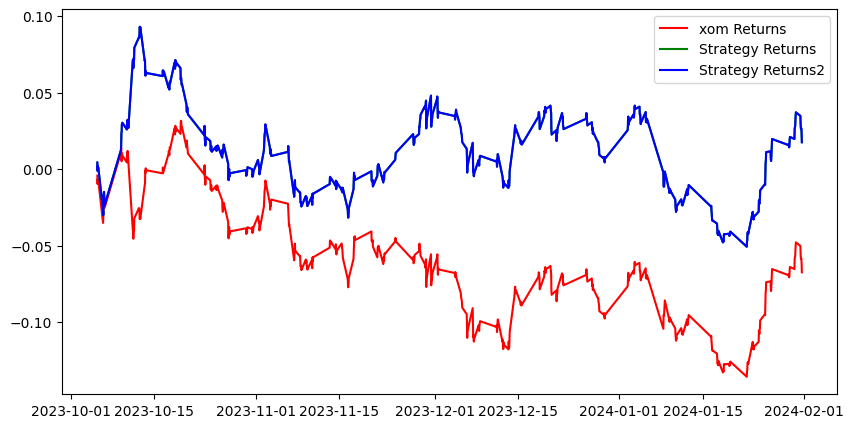

In [32]:
df['Predicted_Signal'] = model.predict(X)
df['xom_returns'] = np.log(df['Close']/df['Close'].shift(1))
Cumulative_Nitfy_returns = np.cumsum(df[split:]['xom_returns'])
df['Strategy_returns'] = df['xom_returns']* df['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(df[split:]['Strategy_returns'])


newdf['Predicted_Signal_new'] = modelnew.predict(Xnew)
newdf['lpg trend'] = np.log(newdf['Close_y']/newdf['Close_y'].shift(1))
newdf['Strategy_returns2'] = newdf['lpg trend']* newdf['Predicted_Signal_new'].shift(1)
Cumulative_Strategy_returns2 = np.cumsum(newdf[split:]['Strategy_returns2'])



plt.figure(figsize=(10,5))

plt.plot(Cumulative_Nitfy_returns, color='r', label = 'xom Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.plot(Cumulative_Strategy_returns, color='b', label = 'Strategy Returns2')

plt.legend()
plt.show()